In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,classification_report,mean_absolute_error,confusion_matrix,f1_score

In [4]:
df=pd.read_csv("matrix_food.csv")

In [5]:
feature = df.drop(['6714'],axis=1)
target  = df['6714']

In [6]:
x=np.array(feature)
y=np.array(target)
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=.1)

In [7]:
tree= DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train) 
tree.score(x_test,y_test)

0.5955253896430367

In [8]:
tree= DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x_train,y_train) 
tree.score(x_test,y_test)

0.52488687782805432

In [9]:
naive_bayes=GaussianNB()
naive_bayes.fit(x_train,y_train)
naive_bayes.score(x_test,y_test)

0.56083459024635496

In [10]:
#random forest default parameter
RandomForest=RandomForestClassifier()
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.66490698843640017

In [11]:
#random forest with 20 estimators parameter, GINI criterion
RandomForest=RandomForestClassifier(n_estimators=20, n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.69205630970336851

In [12]:
#random forest with 20 estimators parameter, entropy criterion
RandomForest=RandomForestClassifier(criterion='entropy',n_estimators=20,n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.65535444947209653

In [13]:
#random forest with 30 estimators parameter, GINI criterion
RandomForest=RandomForestClassifier(n_estimators=30, n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.71141277023629967

In [14]:
#random forest with 30 estimators parameter, entropy criterion
RandomForest=RandomForestClassifier(criterion='entropy',n_estimators=30,n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.66591251885369529

In [15]:
#random forest with 50 estimators parameter, GINI criterion
RandomForest=RandomForestClassifier(n_estimators=50,n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.71292106586224235

In [16]:
#random forest with 50 estimators parameter, entropy criterion
RandomForest=RandomForestClassifier(criterion='entropy',n_estimators=50,n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.67797888386123684

In [17]:
#random forest with 100 estimators parameter, GINI criterion
RandomForest=RandomForestClassifier(n_estimators=100,n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.70965309200603321

In [18]:
#random forest with 100 estimators parameter, entropy criterion
RandomForest=RandomForestClassifier(criterion='entropy',n_estimators=100,n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.67998994469582708

In [19]:
#random forest with 1000 estimators parameter, GINI criterion
RandomForest=RandomForestClassifier(n_estimators=1000, n_jobs=-1)
RandomForest.fit(x_train,y_train)
RandomForest.score(x_test,y_test)

0.71644042232277527

In [22]:
test_true=np.ones(len(x_test))
train_true=np.ones(len(x_train))

In [26]:
x_plot=[]
y_plot=[]
f_plot=[]
err_train_plot=[]
err_test_plot=[]
for i in [10,25,50,100,200,500,1000]:
    RandomForest=RandomForestClassifier(n_estimators=i, n_jobs=-1,random_state=0)
    RandomForest.fit(x_train,y_train)
    res=RandomForest.score(x_test,y_test) #accuracy
    
    y_pred=RandomForest.predict(x_test)
    y_train_pred=RandomForest.predict(x_train)
    
    test_pred=[]
    train_pred=[]
    for x in range(0,len(y_pred)):
#         print("{0}: {1}".format(y_pred[i],y_test[i]))
        test_pred.append(1 if y_pred[x] == y_test[x] else 0)
    
    for x in range(0,len(y_train_pred)):
        train_pred.append(1 if y_train_pred[x] == y_train[x] else 0)
    
    fscore=f1_score(test_true,test_pred)
    
    x_plot.append(i)
    y_plot.append(res)
    f_plot.append(fscore)
    
    err_test=mean_squared_error(test_true,test_pred)
    err_test_plot.append(err_test)
    
    err_train=mean_squared_error(train_true,train_pred)
    err_train_plot.append(err_train)
    
    print("Estimator {0}: {1}, {2}".format(i,res,fscore))

Estimator 10: 0.6744595274007039, 0.8055847470349797
Estimator 25: 0.7033685268979387, 0.8258559622195986
Estimator 50: 0.7116641528406235, 0.8315464825965634
Estimator 100: 0.7151835093011564, 0.8339440128975524
Estimator 200: 0.7154348919054802, 0.8341148886283705
Estimator 500: 0.716691804927099, 0.8349685166202957
Estimator 1000: 0.7164404223227753, 0.8347978910369068


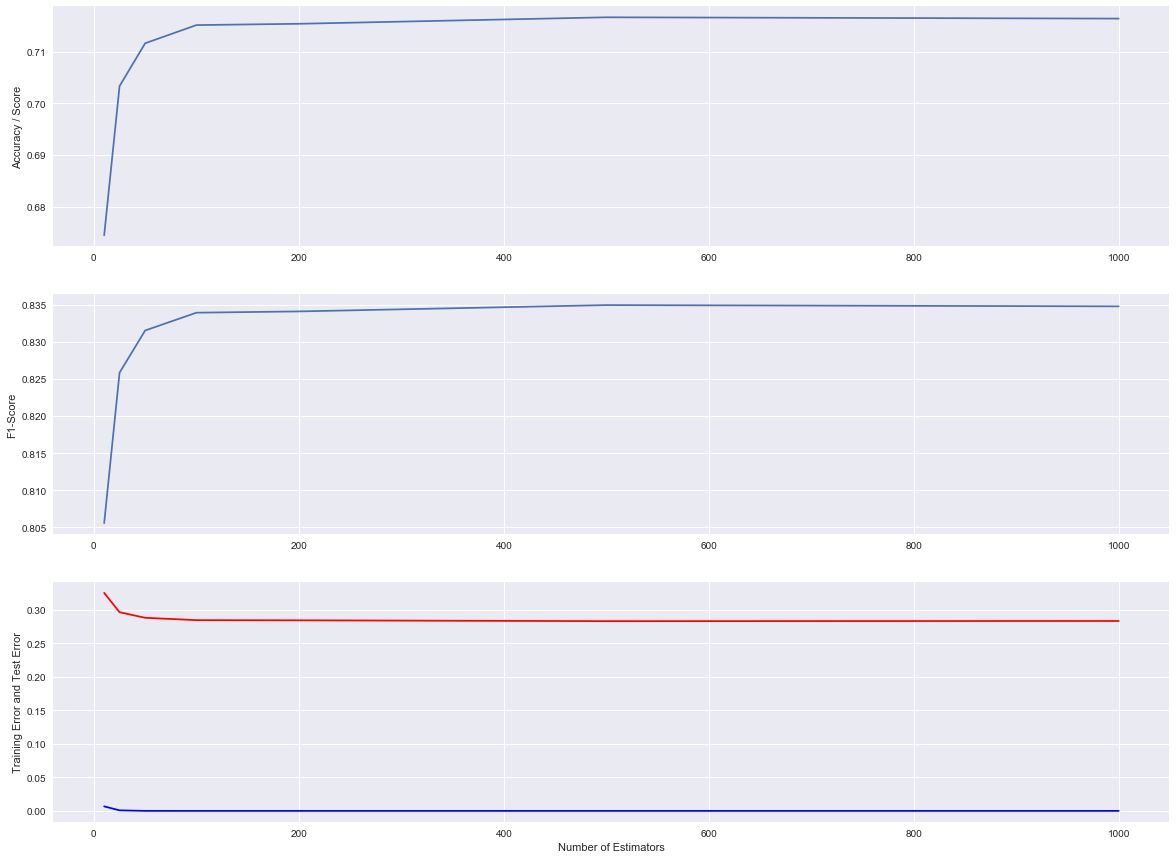

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
plt.figure(figsize=(20,15))

plt.subplot(311)
plt.ylabel("Accuracy / Score")
plt.plot(x_plot,y_plot)

plt.subplot(312)
plt.ylabel("F1-Score")
plt.plot(x_plot,f_plot)

plt.subplot(313)
plt.ylabel("Training Error and Test Error")
plt.xlabel("Number of Estimators")
plt.plot(x_plot,err_test_plot,'r')
plt.plot(x_plot,err_train_plot,'b')

plt.show()
# sns.pointplot(x_plot,y_plot)

In [29]:
testFrame=pd.read_csv('food_test.csv')

In [30]:
tree.predict(testFrame)

array(['italian', 'japanese', 'mexican', ..., 'french', 'southern_us',
       'mexican'], dtype=object)

In [31]:
naive_bayes.predict(testFrame)

array(['irish', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], 
      dtype='<U12')